In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [15]:
# data = pd.read_csv('/Users/xiaoqisun/Desktop/Seven/Discovery Progam/Prairie_View_A&M_University 2016-20 Webscraped.csv')
# data= data.rename(columns={'key':'Keyword'}).merge(right=depart, how='left',left_on='Department Name', right_on='Acronym')
# data = data[['Course Catalogue Number','Department Name_y','Course Name','Course Description','Graduate/Undergraduate','Format','Lab','Academic Catalogue Year','Food Systems','Food Justice/Equity','Critical Pedagogy','Keyword']].rename(columns={'Department Name_y':'Department Name'})
# data.to_csv('Praire combined to upload')

In [2]:
data = pd.read_csv('/Users/xiaoqisun/Desktop/Seven/Discovery Progam/Prairie_View_A&M_University 2016-20 Webscraped.csv').rename(columns={'key':'Keyword'})
data['Keyword'] = data['Keyword'].apply(lambda x: x[1:-1].split(', '))
clean_data = data.explode('Keyword')

In [3]:
# frequency of top 50 keywords
frequency_top50 = clean_data['Keyword'].value_counts().to_frame().head(50)
frequency_top50

,Keyword
'agri',173
'food',160
' nutri',122
'land',93
'agro',92
' animal',77
'crop',72
' soil',71
'farm',46
' metaboli',43


In [4]:
# frequency of top 50 keywords in each department
by_department = clean_data[clean_data['Keyword'].isin(frequency_top50.index)].groupby(['Department Name','Keyword']).count()
frequency_in_department = by_department.loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
frequency_in_department.head()

Count
Department Name               Keyword         
Ag and Human Resources (AGHR) ' rural '      4
                              'agri'        58
                              'food'        42
                              'land'         4
Agricultural Economics (AGEC) ' fiber'       8

In [5]:
# top keyword in each department
by_department_fullkeywords = clean_data.groupby(['Department Name','Keyword']).count().loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
by_department_fullkeywords_reset = by_department_fullkeywords.reset_index()
top_key_dep=by_department_fullkeywords_reset.sort_values('Count').groupby('Department Name').last()
top_key_dep

,Keyword,Count
Department Name,,
1,,1
Ag and Human Resources (AGHR),'agri',58
Agricultural Economics (AGEC),'agri',57
Agricultural Engineering (AGEG),'agri',8
Agronomy (AGRO),'agro',92
Animal Science (ANSC),' animal',33
Architecture (ARCH),'land',8
Army ROTC (ARMY),'land',19
Art (ARTS),' fiber',4


In [6]:
#distribution of top 10 
top3_department = by_department_fullkeywords_reset.groupby('Department Name').sum().sort_values('Count',ascending=False).head(3)
top3_department


,Count
Department Name,
Agronomy (AGRO),364
Animal Science (ANSC),221
Human Nutrition & Food (HUNF),156


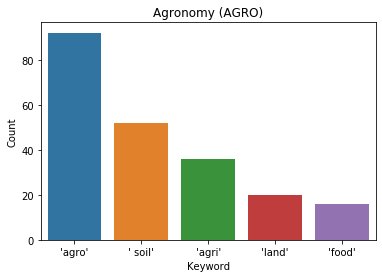

In [8]:
# Argo
plt.figure
ARGO = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department Name']=='Agronomy (AGRO)'].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keyword',y='Count' ,data=ARGO)
plt.title('Agronomy (AGRO)');


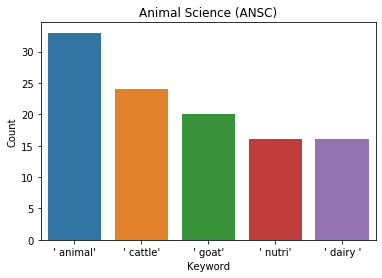

In [9]:
# ANSC
plt.figure
ANSC = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department Name']=='Animal Science (ANSC)'].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keyword',y='Count' ,data=ANSC)
plt.title('Animal Science (ANSC)');


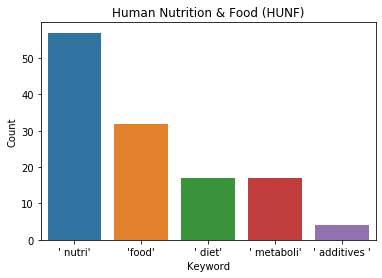

In [10]:

# HUNF
plt.figure
HUNF = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department Name']=='Human Nutrition & Food (HUNF)'].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keyword',y='Count' ,data=HUNF)
plt.title('Human Nutrition & Food (HUNF)');


In [11]:
# export
writer = pd.ExcelWriter('/Users/xiaoqisun/Desktop/Seven/Discovery Progam/EDA/Prairie View A&M University EDA result.xlsx', engine='xlsxwriter')

frequency_top50.to_excel(writer, sheet_name='top 50 keywords')
frequency_in_department.to_excel(writer, sheet_name='keywords in dep')
top_key_dep.to_excel(writer, sheet_name='top keyword in dep')

writer.save()